In [3]:
%matplotlib notebook
import matplotlib as plt
import pandas as pd
from io import StringIO

In [10]:
strdata = """
0 1 0.000002026558
0 10 0.000001430511
0 100 0.000002026558
0 1000 0.000002026558
0 10000 0.000007510185
0 100000 0.000013947487
0 1000000 0.000110507011
0 10000000 0.001129031181
1 1 0.000002026558
1 10 0.000000953674
1 100 0.000001907349
1 1000 0.000002503395
1 10000 0.000007033348
1 100000 0.000013947487
1 1000000 0.000110030174
1 10000000 0.001128435135
2 1 0.000000953674
2 10 0.000001430511
2 100 0.000001549721
2 1000 0.000002026558
2 10000 0.000005006790
2 100000 0.000013947487
2 1000000 0.000110030174
2 10000000 0.001127481461
3 1 0.000001430511
3 10 0.000001072884
3 100 0.000001430511
3 1000 0.000002026558
3 10000 0.000005602837
3 100000 0.000014066696
3 1000000 0.000110507011
3 10000000 0.001127958298
4 1 0.000001549721
4 10 0.000000953674
4 100 0.000001549721
4 1000 0.000001549721
4 10000 0.000005006790
4 100000 0.000015020370
4 1000000 0.000120997429
4 10000000 0.001141905785
5 1 0.000001549721
5 10 0.000001430511
5 100 0.000001072884
5 1000 0.000001430511
5 10000 0.000005006790
5 100000 0.000015020370
5 1000000 0.000120520592
5 10000000 0.001141428947
6 1 0.000001549721
6 10 0.000000953674
6 100 0.000001549721
6 1000 0.000001549721
6 10000 0.000005483627
6 100000 0.000015497208
6 1000000 0.000120997429
6 10000000 0.001140952110
7 1 0.000000953674
7 10 0.000001549721
7 100 0.000000953674
7 1000 0.000001907349
7 10000 0.000005006790
7 100000 0.000015497208
7 1000000 0.000120997429
7 10000000 0.001142024994
8 1 0.000001430511
8 10 0.000001072884
8 100 0.000001549721
8 1000 0.000001907349
8 10000 0.000005006790
8 100000 0.000015497208
8 1000000 0.000120997429
8 10000000 0.001126527786
9 1 0.000001072884
9 10 0.000000953674
9 100 0.000001430511
9 1000 0.000001549721
9 10000 0.000005006790
9 100000 0.000015020370
9 1000000 0.000120520592
9 10000000 0.001141548157
10 1 0.000001549721
10 10 0.000001430511
10 100 0.000000953674
10 1000 0.000002026558
10 10000 0.000005006790
10 100000 0.000015020370
10 1000000 0.000120997429
10 10000000 0.001142024994
11 1 0.000001430511
11 10 0.000001072884
11 100 0.000000953674
11 1000 0.000002026558
11 10000 0.000005006790
11 100000 0.000015020370
11 1000000 0.000120520592
11 10000000 0.001142024994
12 1 0.000001549721
12 10 0.000000953674
12 100 0.000001430511
12 1000 0.000001549721
12 10000 0.000005006790
12 100000 0.000015497208
12 1000000 0.000120520592
12 10000000 0.001141548157
13 1 0.000001549721
13 10 0.000000953674
13 100 0.000001549721
13 1000 0.000001549721
13 10000 0.000005006790
13 100000 0.000014901161
13 1000000 0.000120520592
13 10000000 0.001128554344
14 1 0.000000953674
14 10 0.000001072884
14 100 0.000001072884
14 1000 0.000001430511
14 10000 0.000005006790
14 100000 0.000015497208
14 1000000 0.000120997429
14 10000000 0.001141428947
15 1 0.000001430511
15 10 0.000001072884
15 100 0.000001072884
15 1000 0.000001430511
15 10000 0.000005006790
15 100000 0.000015020370
15 1000000 0.000120997429
15 10000000 0.001141428947
16 1 0.000001549721
16 10 0.000000953674
16 100 0.000001072884
16 1000 0.000001549721
16 10000 0.000005006790
16 100000 0.000015020370
16 1000000 0.000120520592
16 10000000 0.001140952110
17 1 0.000001430511
17 10 0.000001072884
17 100 0.000000953674
17 1000 0.000001907349
17 10000 0.000004529953
17 100000 0.000015497208
17 1000000 0.000120997429
17 10000000 0.001142501831
18 1 0.000001549721
18 10 0.000000953674
18 100 0.000000953674
18 1000 0.000001549721
18 10000 0.000005006790
18 100000 0.000015497208
18 1000000 0.000120997429
18 10000000 0.001126408577
19 1 0.000001549721
19 10 0.000000953674
19 100 0.000001072884
19 1000 0.000002026558
19 10000 0.000005006790
19 100000 0.000015497208
19 1000000 0.000120997429
19 10000000 0.001139521599
20 1 0.000001549721
20 10 0.000001549721
20 100 0.000000953674
20 1000 0.000002026558
20 10000 0.000005006790
20 100000 0.000015497208
20 1000000 0.000120520592
20 10000000 0.001140952110
21 1 0.000000953674
21 10 0.000001072884
21 100 0.000001430511
21 1000 0.000001549721
21 10000 0.000005006790
21 100000 0.000015020370
21 1000000 0.000120997429
21 10000000 0.001140952110
22 1 0.000000953674
22 10 0.000001072884
22 100 0.000000953674
22 1000 0.000001907349
22 10000 0.000005483627
22 100000 0.000015497208
22 1000000 0.000120520592
22 10000000 0.001144051552
23 1 0.000001072884
23 10 0.000000953674
23 100 0.000001430511
23 1000 0.000002026558
23 10000 0.000005006790
23 100000 0.000015497208
23 1000000 0.000120997429
23 10000000 0.001127004623
24 1 0.000001549721
24 10 0.000001430511
24 100 0.000001430511
24 1000 0.000001549721
24 10000 0.000005006790
24 100000 0.000015497208
24 1000000 0.000120997429
24 10000000 0.001140475273
25 1 0.000001430511
25 10 0.000000953674
25 100 0.000001072884
25 1000 0.000001430511
25 10000 0.000005006790
25 100000 0.000015497208
25 1000000 0.000120997429
25 10000000 0.001140475273
26 1 0.000000953674
26 10 0.000001072884
26 100 0.000001549721
26 1000 0.000001430511
26 10000 0.000004529953
26 100000 0.000015020370
26 1000000 0.000120401382
26 10000000 0.001141548157
27 1 0.000001072884
27 10 0.000001430511
27 100 0.000000953674
27 1000 0.000001549721
27 10000 0.000005006790
27 100000 0.000015020370
27 1000000 0.000120997429
27 10000000 0.001140475273
28 1 0.000001072884
28 10 0.000000953674
28 100 0.000001430511
28 1000 0.000001549721
28 10000 0.000005006790
28 100000 0.000015497208
28 1000000 0.000120520592
28 10000000 0.001127004623
29 1 0.000001549721
29 10 0.000001072884
29 100 0.000001430511
29 1000 0.000000953674
29 10000 0.000005006790
29 100000 0.000015020370
29 1000000 0.000120997429
29 10000000 0.001143932343
"""

In [11]:
df = pd.read_csv(StringIO(strdata), sep=" ", names=["try", "len", "time"])

In [12]:
df['throughput']=(2 * df['len']/df['time']) / 1000000 # MB/s

<IPython.core.display.Javascript object>


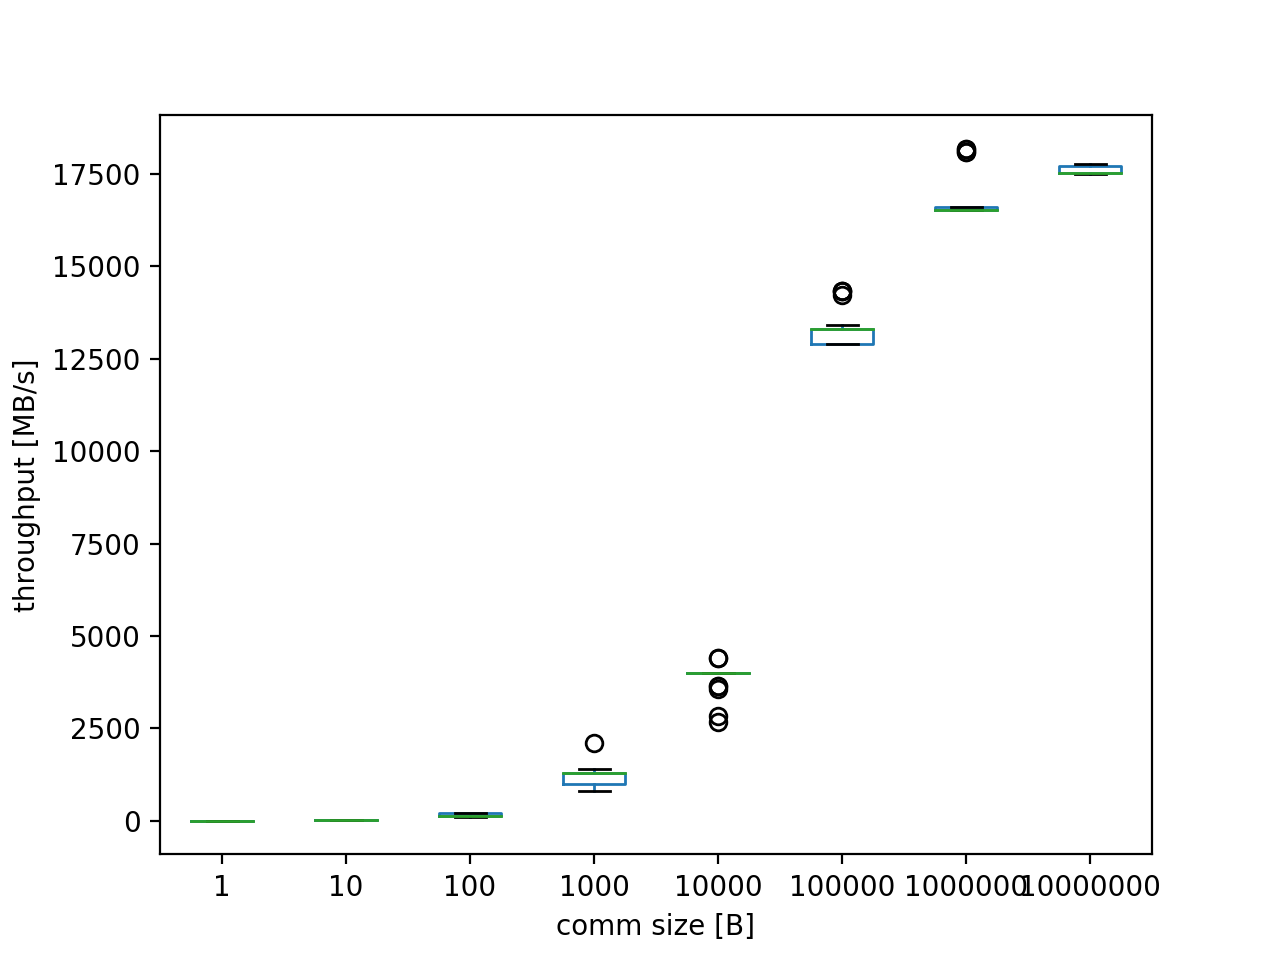

Text(0,0.5,'throughput [MB/s]')

In [13]:
bw_df = df[['try', 'len', 'throughput']].pivot(index='try', columns='len', values='throughput')
ax = bw_df.plot(kind='box')
ax.set_xlabel("comm size [B]")
ax.set_ylabel("throughput [MB/s]")
